# Project Title 

Instagram fake spammer genuine accounts

# Goal: 
Build a classification model to predict whether an Instagram account is fake or genuine based on given features.

# Introduction:

In this project, I developed a machine learning model to classify Instagram accounts as fake or genuine using a balanced dataset. I performed data cleaning, exploratory data analysis, and feature engineering using attributes such as profile picture availability, username/full name patterns, post count, followers, following, and follower-to-following ratio. I trained models including Random Forest, and Decision Tree evaluated their performance, and selected the best model for accurate fake account detection.

# Columns Overview:
  profile_pic: Binary (1 if the profile has a picture, 0 otherwise).
  nums/length username: Number of characters or numbers in the username.
  fullname words: Number of words in the full name.
  nums/length fullname: Character length and number count in the full name.
  name == username: Binary (1 if the username and full name are identical, 0
  otherwise).
  description length: Character length of the bio/description.
  external URL: Binary (1 if an external URL is present, 0 otherwise).● private: Binary (1 if the profile is private, 0 otherwise).
  #posts: Number of posts.
  #followers: Number of followers.
  #follows: Number of accounts followed.
  fake: Target label (1 if fake, 0 if genuine).

 # Import Required Libraries

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Load & Explore the Dataset

In [388]:
df = pd.read_csv("train.csv")
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [203]:
df.shape

(576, 12)

# Data Cleaning

In [206]:
df.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

# Check duplicated 

In [209]:
df.duplicated().sum()

2

# View the duplicate rows

In [212]:
df[df.duplicated()]

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
197,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
525,1,0.91,1,0.0,0,0,0,0,0,75,26,1


We will not drop them because it's valuable information 

# Exploratory Data Analysis (EDA)

# 'fake' column (Target column)

In [217]:
df['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

# Visualize Class Balance

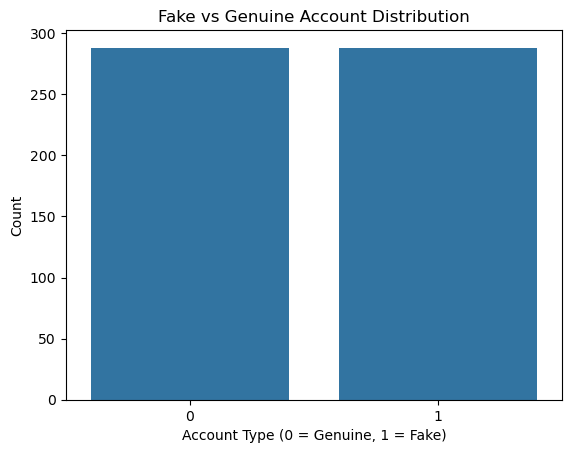

In [220]:
sns.countplot(x='fake', data=df)
plt.title("Fake vs Genuine Account Distribution")
plt.xlabel("Account Type (0 = Genuine, 1 = Fake)")
plt.ylabel("Count")
plt.show()

# 'profile_pic' Column

In [223]:
df['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

# Check Relation with Target (fake)
This will show the percentage of fake vs genuine for each profile pic value.

In [226]:
pd.crosstab(df['profile pic'], df['fake'], normalize='index') * 100

fake,0,1
profile pic,,
0,1.162791,98.837209
1,70.792079,29.207921


# Visual check

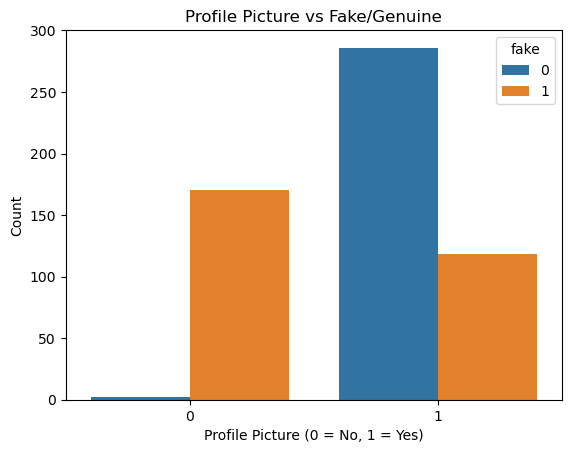

In [229]:
sns.countplot(x='profile pic', hue='fake', data=df)
plt.title("Profile Picture vs Fake/Genuine")
plt.xlabel("Profile Picture (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Interpretation:

If no profile pic, then higher chance of fake.            
If has profile pic, then higher chance of genuine.

# 'nums/length username' Column

In [234]:
df['nums/length username'].value_counts()

nums/length username
0.00    299
0.33     24
0.38     14
0.25     14
0.44     14
0.50     12
0.18     11
0.57     10
0.43     10
0.22     10
0.29      9
0.20      9
0.31      9
0.36      9
0.40      8
0.12      8
0.27      7
0.10      7
0.14      7
0.15      5
0.24      5
0.30      5
0.07      4
0.09      4
0.55      4
0.67      4
0.08      4
0.19      3
0.13      3
0.88      3
0.11      3
0.46      3
0.47      3
0.89      3
0.58      3
0.17      2
0.06      2
0.91      2
0.21      2
0.42      2
0.16      2
0.45      2
0.64      1
0.71      1
0.83      1
0.41      1
0.28      1
0.54      1
0.80      1
0.73      1
0.60      1
0.86      1
0.62      1
0.92      1
Name: count, dtype: int64

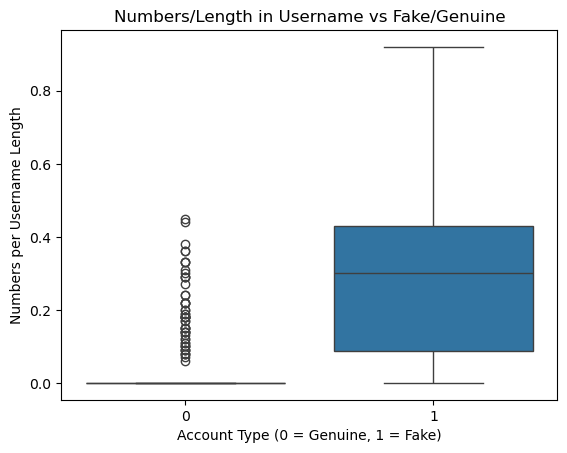

In [236]:
sns.boxplot(x='fake', y='nums/length username', data=df)
plt.title("Numbers/Length in Username vs Fake/Genuine")
plt.xlabel("Account Type (0 = Genuine, 1 = Fake)")
plt.ylabel("Numbers per Username Length")
plt.show()


#  Categorizing into Low / Medium / High

In [239]:
def username_num_ratio_category(x):
    if x == 0:
        return "Low (No numbers)"
    elif x <= 0.4:
        return "Medium (Few numbers)"
    else:
        return "High (Many numbers)"

df['username_num_ratio_cat'] = df['nums/length username'].apply(username_num_ratio_category)
print(df.head())

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake username_num_ratio_cat  
0        1000       955     0   Medium (Few

In [241]:
df['username_num_ratio_cat'].value_counts()

username_num_ratio_cat
Low (No numbers)        299
Medium (Few numbers)    191
High (Many numbers)      86
Name: count, dtype: int64

# See Relation with fake/genuine

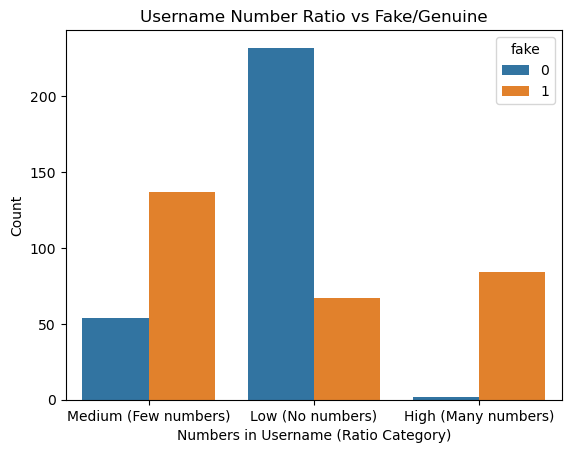

In [244]:
sns.countplot(x='username_num_ratio_cat', hue='fake', data=df)
plt.title("Username Number Ratio vs Fake/Genuine")
plt.xlabel("Numbers in Username (Ratio Category)")
plt.ylabel("Count")
plt.show()

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['username_num_ratio_cat_encoded'] = le.fit_transform(df['username_num_ratio_cat'])
print(df.head())

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  post_count_cat username_num_ratio_cat  \
0        1000       955   

# 'name==username' Column

In [247]:
df['name==username'].value_counts()

name==username
0    556
1     20
Name: count, dtype: int64

# Relationship with the fake(target):

In [250]:
pd.crosstab(df['name==username'], df['fake'], normalize='index') * 100

fake,0,1
name==username,,
0,51.618705,48.381295
1,5.000000,95.000000


# Visual check

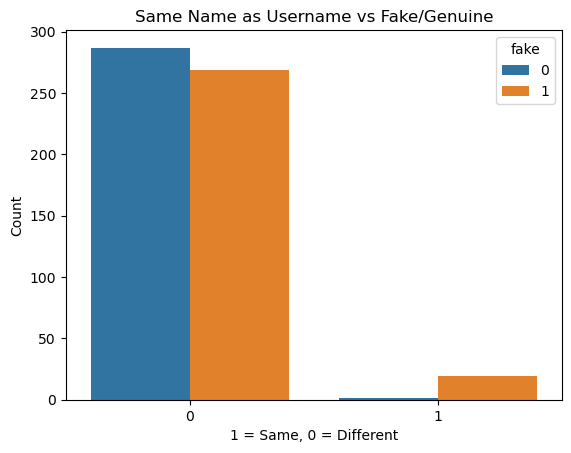

In [253]:
sns.countplot(x='name==username', hue='fake', data=df)
plt.title("Same Name as Username vs Fake/Genuine")
plt.xlabel("1 = Same, 0 = Different")
plt.ylabel("Count")
plt.show()


# Interpretation

1 (same): Mostly fake       
0 (different): Mostly genuine

# 'fullname words' Column

In [257]:
df['fullname words'].value_counts()

fullname words
1     283
2     187
0      57
3      34
4       7
5       4
6       2
12      1
10      1
Name: count, dtype: int64

# Compare it with target(fake) column.

In [260]:
pd.crosstab(df['fullname words'], df['fake'], normalize='index') * 100

fake,0,1
fullname words,,
0,52.631579,47.368421
1,26.501767,73.498233
2,78.074866,21.925134
3,73.529412,26.470588
4,71.428571,28.571429
5,75.000000,25.000000
6,100.000000,0.000000
10,100.000000,0.000000
12,100.000000,0.000000


# Visual check

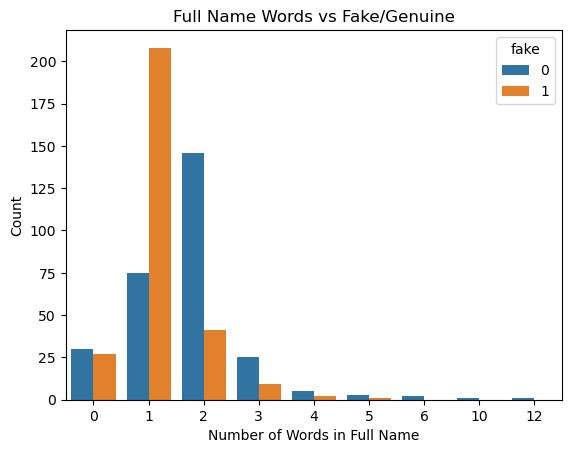

In [81]:
sns.countplot(x='fullname words', hue='fake', data=df)
plt.title("Full Name Words vs Fake/Genuine")
plt.xlabel("Number of Words in Full Name")
plt.ylabel("Count")
plt.show()

# nums/length fullname Column

Genuine accounts: no numbers in the full name → ratio close to 0.00.  
Fake accounts: Often use numbers in the full name → higher ratio.

In [265]:
df['nums/length fullname'].value_counts()  

nums/length fullname
0.00    518
0.33     11
0.40      7
0.25      4
0.50      3
0.31      3
1.00      3
0.22      3
0.24      3
0.43      2
0.36      2
0.12      2
0.18      2
0.44      2
0.38      1
0.57      1
0.27      1
0.29      1
0.20      1
0.89      1
0.11      1
0.14      1
0.08      1
0.10      1
0.46      1
Name: count, dtype: int64

# Check fake vs genuine tendency

Percentage table

In [88]:
pd.crosstab(df['nums/length fullname'], df['fake'], normalize='index') * 100

fake,0,1
nums/length fullname,,
0.00,54.054054,45.945946
0.08,100.000000,0.000000
0.10,100.000000,0.000000
0.11,0.000000,100.000000
0.12,50.000000,50.000000
0.14,100.000000,0.000000
0.18,0.000000,100.000000
0.20,0.000000,100.000000
0.22,0.000000,100.000000


# Group into Low/Medium/High numeric ratio

In [268]:
def fullname_num_ratio_category(x):
    if x == 0:
        return "Low (No numbers)"
    elif x <= 0.4:
        return "Medium (Few numbers)"
    else:
        return "High (Many numbers)"

df['fullname_num_ratio_cat'] = df['nums/length fullname'].apply(fullname_num_ratio_category)
print(df.head())

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake username_num_ratio_cat fullname_num_ratio_cat  
0        1000       

In [270]:
pd.crosstab(df['fullname_num_ratio_cat'], df['fake'], normalize='index') * 100

fake,0,1
fullname_num_ratio_cat,,
High (Many numbers),0.000000,100.000000
Low (No numbers),54.054054,45.945946
Medium (Few numbers),17.777778,82.222222


# Visual check

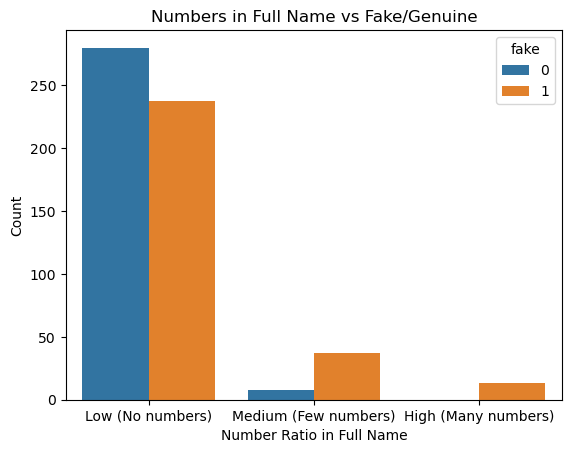

In [273]:
sns.countplot(x='fullname_num_ratio_cat', hue='fake', data=df)
plt.title("Numbers in Full Name vs Fake/Genuine")
plt.xlabel("Number Ratio in Full Name")
plt.ylabel("Count")
plt.show()

# Interpretation

Low (No numbers): Mostly genuine.   
Medium (Few numbers): Mixed but higher fake percentage than low.    
High (Many numbers): Often fake.

# 'description length' Column

Empty bio: 0 characters.    
Fake accounts: No bio at all (0)        
             : Very short or generic bios (2, 5 characters)         
             : Random numbers or emojis instead of meaningful text.
             
Genuine accounts often have: Medium to long bios describing themselves, hobbies, work, etc.           
                           : Usually more characters.          

In [279]:
df['description length'].value_counts()

description length
0      326
35       8
2        7
23       6
50       6
19       6
12       6
26       6
43       5
34       5
30       5
5        5
18       5
46       4
28       4
54       4
40       4
148      4
1        4
9        4
24       4
59       4
70       3
123      3
39       3
149      3
91       3
11       3
44       3
37       3
6        3
13       3
20       3
81       3
27       3
71       3
48       3
55       2
15       2
73       2
146      2
32       2
61       2
10       2
33       2
17       2
150      2
86       2
67       2
51       2
62       2
53       2
21       2
129      2
82       2
103      2
98       2
126      2
122      2
138      2
134      2
4        2
57       2
3        2
22       2
74       2
64       2
42       2
8        2
80       1
109      1
96       1
106      1
63       1
112      1
101      1
68       1
132      1
16       1
49       1
120      1
25       1
139      1
31       1
7        1
36       1
105      1
140      1
117      1
10

In [281]:
def bio_length_category(x):
    if x == 0:
        return "Empty"
    elif x <= 20:
        return "Short"
    elif x <= 100:
        return "Medium"
    else:
        return "Long"

df['bio_length_cat'] = df['description length'].apply(bio_length_category)
print(df.head())

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake username_num_ratio_cat fullname_num_ratio_cat  \
0        1000      

# Check fake/genuine distribution

In [284]:
pd.crosstab(df['bio_length_cat'], df['fake'], normalize='index') * 100

fake,0,1
bio_length_cat,,
Empty,23.926380,76.073620
Long,90.243902,9.756098
Medium,86.896552,13.103448
Short,73.437500,26.562500


# Visual check

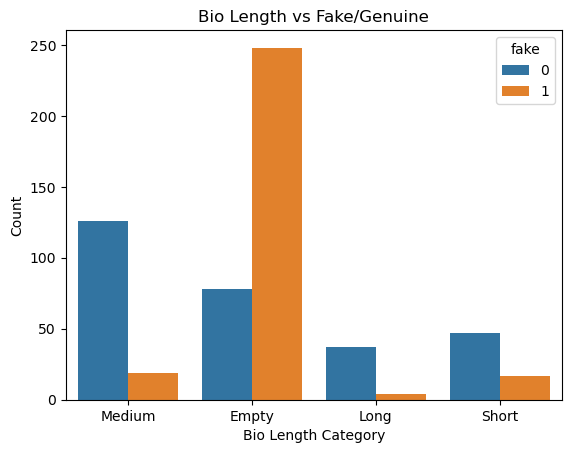

In [287]:
sns.countplot(x='bio_length_cat', hue='fake', data=df)
plt.title("Bio Length vs Fake/Genuine")
plt.xlabel("Bio Length Category")
plt.ylabel("Count")
plt.show()

# Interpretation

Empty bio: Higher fake chance.      
Short bio: Mixed, but still suspicious.      
Medium/Long bio: Mostly genuine.

# 'external URL' Column

In [291]:
df['external URL'].value_counts()

external URL
0    509
1     67
Name: count, dtype: int64

In [293]:
import pandas as pd
pd.crosstab(df['external URL'], df['fake'], normalize='index') * 100

fake,0,1
external URL,,
0,43.418468,56.581532
1,100.000000,0.000000


# Visual check

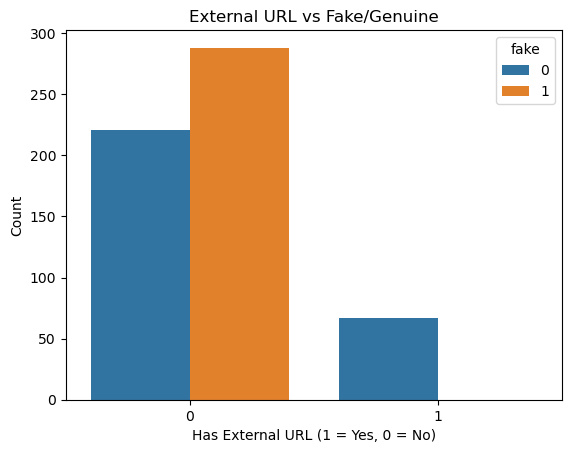

In [296]:
sns.countplot(x='external URL', hue='fake', data=df)
plt.title("External URL vs Fake/Genuine")
plt.xlabel("Has External URL (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Interpretation

No URL(0): Could be fake or genuine.             
Has URL(1):More likely genuine.

# 'private' Column   

Genuine accounts(0): Public + external URL + many followers        
Fake accounts(1): Private + 0 posts + 0 profile pic

In [300]:
df['private'].value_counts()

private
0    356
1    220
Name: count, dtype: int64

In [302]:
pd.crosstab(df['private'], df['fake'], normalize='index') * 100

fake,0,1
private,,
0,48.876404,51.123596
1,51.818182,48.181818


# Visual check

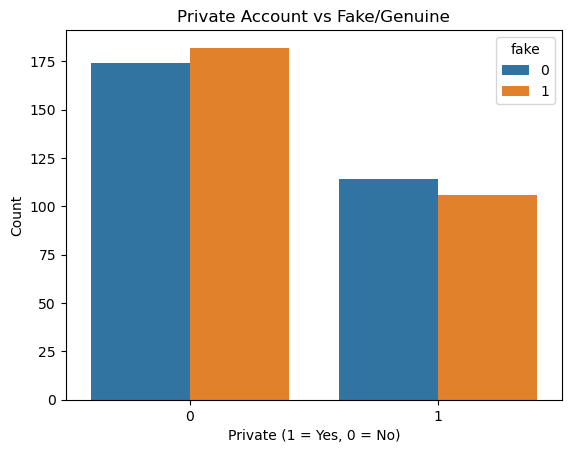

In [305]:
sns.countplot(x='private', hue='fake', data=df)
plt.title("Private Account vs Fake/Genuine")
plt.xlabel("Private (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Interpretation

Private(1): Slightly higher fake chance.       
Public(0): More genuine.

# '#posts' Column   

Fake accounts: Often have 0 posts Or very few posts.           
Genuine accounts: Usually have many posts over time.

In [309]:
df['#posts'].value_counts()

#posts
0       157
1        28
2        22
5        15
3        14
4        13
8        12
7        10
12        9
6         9
9         9
10        7
13        6
15        5
28        5
21        4
111       4
77        4
24        4
63        4
16        4
11        4
59        4
131       3
65        3
19        3
26        3
33        3
14        3
156       3
74        3
32        3
25        3
53        3
142       2
34        2
43        2
149       2
301       2
29        2
22        2
103       2
31        2
92        2
38        2
40        2
197       2
85        2
126       2
20        2
98        2
108       2
36        2
69        2
62        2
44        2
222       2
93        2
52        2
334       2
17        2
75        2
18        2
57        2
91        2
201       1
145       1
135       1
117       1
119       1
54        1
112       1
487       1
133       1
70        1
403       1
990       1
411       1
192       1
94        1
56        1
389       1
373      

# Group them into ranges

In [312]:
def post_count_category(x):
    if x == 0:
        return "No posts"
    elif x <= 5:
        return "Few posts"
    elif x <= 50:
        return "Moderate posts"
    else:
        return "Many posts"

df['post_count_cat'] = df['#posts'].apply(post_count_category)
print(df.head())

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake username_num_ratio_cat fullname_num_ratio_cat  \
0        1000      

In [314]:
df['post_count_cat'].value_counts()

post_count_cat
Many posts        188
No posts          157
Moderate posts    139
Few posts          92
Name: count, dtype: int64

In [316]:
pd.crosstab(df['post_count_cat'], df['fake'], normalize='index') * 100

fake,0,1
post_count_cat,,
Few posts,23.913043,76.086957
Many posts,93.085106,6.914894
Moderate posts,62.589928,37.410072
No posts,2.547771,97.452229


# Visual check

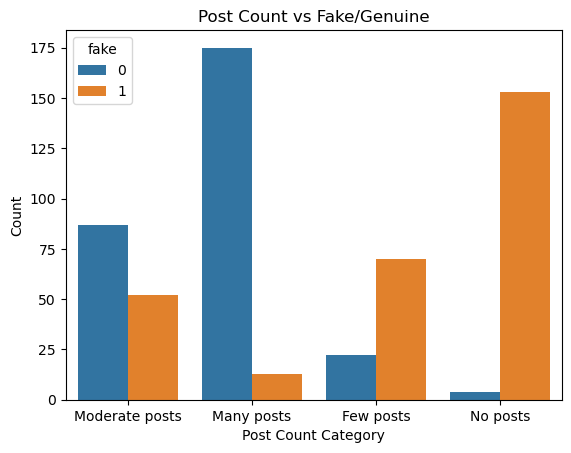

In [127]:
sns.countplot(x='post_count_cat', hue='fake', data=df)
plt.title("Post Count vs Fake/Genuine")
plt.xlabel("Post Count Category")
plt.ylabel("Count")
plt.show()

# Interpretation

No posts(0): Mostly fake.      
Few posts(1–5): Many fakes, some genuine.           
Moderate(6–50): Mostly genuine.               
Many posts(>50): Highly likely genuine.

# '#followers' Column

Fake accounts often have: Very few followers(0–10)               
Genuine accounts often have: More followers

In [321]:
df['#followers'].value_counts()

#followers
0           18
49           9
16           8
15           8
1            7
5            7
34           6
77           6
39           5
12           5
40           5
21           5
42           5
2            5
23           4
10           4
178          4
47           4
57           4
31           4
32           4
26           4
51           4
59           4
9            3
19           3
96           3
265          3
66           3
99           3
162          3
43           3
17           3
53           3
18           3
7            3
48           3
25           3
50           3
24           3
55           3
8            3
6            3
4            3
13           3
218          3
33           2
87           2
38           2
1456         2
668          2
104          2
115          2
70           2
122          2
166          2
3            2
138          2
206          2
494          2
417          2
5282         2
106          2
1204         2
135          2
82           2

In [323]:
def follower_count_category(x):
    if x <= 10:
        return "Very Low (0–10)"
    elif x <= 100:
        return "Low (11–100)"
    elif x <= 1000:
        return "Medium (101–1K)"
    else:
        return "High (>1K)"

df['follower_count_cat'] = df['#followers'].apply(follower_count_category)
print(df.head())

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake username_num_ratio_cat fullname_num_ratio_cat  \
0        1000      

In [325]:
pd.crosstab(df['follower_count_cat'], df['fake'], normalize='index') * 100

fake,0,1
follower_count_cat,,
High (>1K),95.370370,4.629630
Low (11–100),11.282051,88.717949
Medium (101–1K),75.348837,24.651163
Very Low (0–10),1.724138,98.275862


# Visual check

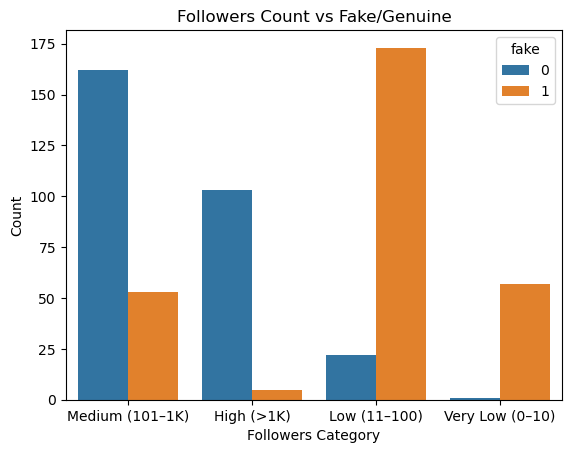

In [328]:
sns.countplot(x='follower_count_cat', hue='fake', data=df)
plt.title("Followers Count vs Fake/Genuine")
plt.xlabel("Followers Category")
plt.ylabel("Count")
plt.show()

# Interpretation

0–10 followers: Mostly fake.             
11–100: Many fakes, some genuine.             
101–1K: Mostly genuine.           
#>1K: Highly likely genuine.

# '#follows' column

Fake accounts often: Follow very many accounts (hundreds or thousands).                     
                   : Have a high follows-to-followers ratio.               
Genuine accounts usually: Follow a moderate number of people.                
                        : Have a more balanced follows-to-followers ratio.

In [332]:
df['#follows'].value_counts()

#follows
0       11
1        6
26       6
37       5
22       5
76       5
8        5
11       5
333      5
44       4
64       4
2        4
16       4
4        4
15       4
98       4
46       3
208      3
177      3
49       3
20       3
87       3
413      3
38       3
82       3
6        3
151      3
23       3
60       3
17       3
48       3
164      3
52       3
130      3
694      3
45       3
61       3
24       2
71       2
748      2
215      2
56       2
802      2
108      2
66       2
35       2
899      2
3        2
489      2
41       2
360      2
395      2
88       2
30       2
25       2
935      2
1155     2
438      2
229      2
75       2
28       2
139      2
305      2
167      2
40       2
111      2
638      2
529      2
80       2
7500     2
387      2
55       2
178      2
36       2
689      2
39       2
34       2
27       2
13       2
408      2
157      2
555      2
289      2
112      2
583      2
618      2
999      2
652      2
121      2
179      2
1

# Group into ranges

In [335]:
def follows_count_category(x):
    if x <= 10:
        return "Very Low (0–10)"
    elif x <= 100:
        return "Low (11–100)"
    elif x <= 500:
        return "Medium (101–500)"
    else:
        return "High (>500)"

df['follows_count_cat'] = df['#follows'].apply(follows_count_category)
print(df.head())

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake username_num_ratio_cat fullname_num_ratio_cat  \
0        1000      

In [337]:
pd.crosstab(df['follows_count_cat'], df['fake'], normalize='index') * 100

fake,0,1
follows_count_cat,,
High (>500),75.000000,25.000000
Low (11–100),18.518519,81.481481
Medium (101–500),63.235294,36.764706
Very Low (0–10),7.142857,92.857143


# Visualize

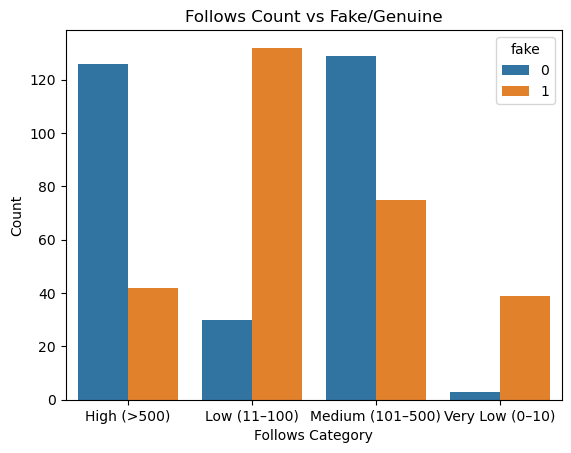

In [340]:
sns.countplot(x='follows_count_cat', hue='fake', data=df)
plt.title("Follows Count vs Fake/Genuine")
plt.xlabel("Follows Category")
plt.ylabel("Count")
plt.show()

# Extra analysis (very useful)
We can create a follows-to-followers ratio, which is a strong indicator of fake accounts.

In [152]:
df['follow_ratio'] = (df['#follows'] + 1) / (df['#followers'] + 1)
print(df.head())

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  post_count_cat username_num_ratio_cat  \
0        1000       955   

# Final feature selection for X 

fake(Target variable): Dependent variable (y)                                       
features(columns): Independent variables (X)

In [344]:
features = [
    'profile pic',
    'nums/length username',
    'fullname words',
    'nums/length fullname',
    'name==username',
    'description length',
    'external URL',
    'private',
    '#posts',
    '#followers',
    '#follows',
    'follow_ratio'
]

X = df[features]
y = df['fake']
print(X)
print(y)

KeyError: "['follow_ratio'] not in index"

# Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

# Choose the right model(RandomForestClassifier)

binary classification (fake = 0 or 1)                       
This is a bagging ensemble model that builds multiple decision trees and combines their votes for prediction.             
Create the model object.                                  
We initialize the classifier and set parameters.

In [352]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,      
    random_state=42,        
    class_weight='balanced' 
)

# Fit (Train) the model

call fit():

In [355]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [357]:
print("Number of trees:", len(rf.estimators_))

Number of trees: 100


# Prediction in Random Forest

In [360]:
y_pred = rf.predict(X_test)
print(y_pred)

[1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1
 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1
 0 0 1 0 1]


In [362]:
y_pred.shape

(116,)

# Probability Prediction (predict_proba)
Predicts the probability of being Fake or Genuine.

In [181]:
y_proba = rf.predict_proba(X_test)
print(y_proba)

[[0.01 0.99]
 [0.   1.  ]
 [0.94 0.06]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.98 0.02]
 [1.   0.  ]
 [0.01 0.99]
 [0.41 0.59]
 [1.   0.  ]
 [0.74 0.26]
 [0.97 0.03]
 [0.17 0.83]
 [0.05 0.95]
 [0.83 0.17]
 [0.39 0.61]
 [0.15 0.85]
 [0.7  0.3 ]
 [0.   1.  ]
 [0.02 0.98]
 [0.08 0.92]
 [0.74 0.26]
 [0.   1.  ]
 [0.6  0.4 ]
 [0.96 0.04]
 [0.   1.  ]
 [0.63 0.37]
 [1.   0.  ]
 [0.25 0.75]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.02 0.98]
 [0.99 0.01]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.92 0.08]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.95 0.05]
 [0.41 0.59]
 [0.02 0.98]
 [0.93 0.07]
 [0.74 0.26]
 [0.01 0.99]
 [0.8  0.2 ]
 [0.95 0.05]
 [0.99 0.01]
 [0.   1.  ]
 [0.82 0.18]
 [0.55 0.45]
 [0.9  0.1 ]
 [0.   1.  ]
 [0.93 0.07]
 [1.   0.  ]
 [0.97 0.03]
 [0.   1.  ]
 [0.81 0.19]
 [0.   1.  ]
 [0.97 0.03]
 [0.   1.  ]
 [0.98 0.02]
 [0.03 0.97]
 [0.15 0.85]
 [0.91 0.09]
 [0.97 0.03]
 [0.65 0.35]
 [0.96 0.04]
 [0.03 0.97]
 [0.01 0.99]
 [0.48 0.52]
 [0.03 0.97]
 [0.43 0.57]

# Accuracy Score

Measures the percentage of correct predictions.

In [366]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9224137931034483


# Confusion Matrix

Shows exactly how many predictions were correct and wrong.

In [369]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Genuine(0)', 'Actual Fake(1)'],
                         columns=['Predicted Genuine(0)', 'Predicted Fake(1)'])
print(cm_df)

                   Predicted Genuine(0)  Predicted Fake(1)
Actual Genuine(0)                    53                  5
Actual Fake(1)                        4                 54


# Classification Report

Gives precision, recall, and F1-score.           
Precision → When the model says “Fake”, how often is it correct?       
Recall → Of all real Fake accounts, how many did the model catch?       
F1-score → Balance between precision & recall.        
Support → Number of samples in each class.

In [372]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        58
           1       0.92      0.93      0.92        58

    accuracy                           0.92       116
   macro avg       0.92      0.92      0.92       116
weighted avg       0.92      0.92      0.92       116



# ROC Curve & AUC (Optional)

Measures how well your model separates fake from genuine accounts.

AUC Score: 0.9814209274673008


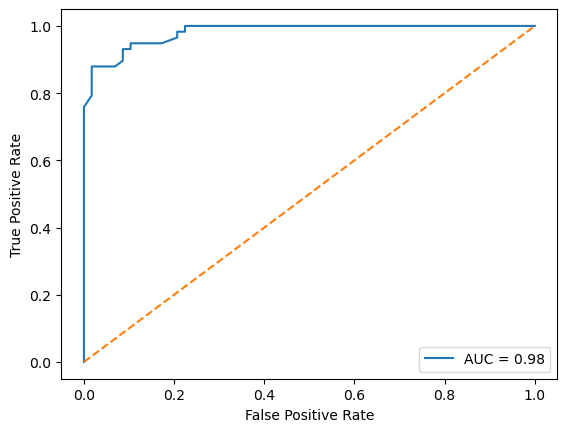

In [194]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Correlation Analysis

The correlation analysis revealed that features like nums/length username and follow_ratio had the highest positive correlation with the Fake account label, indicating that fake accounts often have usernames with more numbers and unusual lengths, and unusual follower-following ratios.
On the other hand, features like #posts, fullname words, and presence of external URL showed negative correlations, suggesting that genuine accounts tend to have more posts, more natural full names, and are more likely to have external links in their profile.
This insight helped in identifying which features were more important for building the classification model.

# Training Dataset Correlation with Target

In [377]:
corr = df.corr(numeric_only=True)['fake'].sort_values(ascending=False)
print(corr)

fake                    1.000000
nums/length username    0.587687
nums/length fullname    0.246782
name==username          0.170695
private                -0.028586
#followers             -0.093689
#follows               -0.224835
#posts                 -0.245355
fullname words         -0.298793
external URL           -0.362809
description length     -0.460825
profile pic            -0.637315
Name: fake, dtype: float64


# Final Conclusion

1. Model Performance Summary             
Example:            
The final Random Forest model achieved an accuracy of 92%, precision of 92%, recall of 92%, and AUC is 0.9814209274673008 on the test dataset. This indicates that the model is effective in identifying fake accounts while minimizing false positives.                   

B. Key Findings                
Example:                 
Fake accounts usually have no profile picture, fewer posts, and extreme follower/following ratios.              
Usernames with a high proportion of numbers and unusual patterns are more common in fake accounts.                    
Presence of a detailed bio and external link is more common in genuine accounts.                      

C. Possible Applications                         
Example:                          

This model can be integrated into Instagram moderation tools to automatically flag suspicious accounts for manual review. Social media platforms can use such tools to improve user safety and reduce spam.                        

D. Limitations                      
Example:                                              
The dataset size was relatively small, so results may vary on larger datasets.                      
The model was trained on specific profile features and may not detect all types of fake accounts.                         
Real-time deployment would require additional optimization.                   

E. Future Improvements                 
Example:                                            
Include more profile activity data such as posting frequency and engagement rate.                             
Incorporate NLP-based text analysis of bios and captions.                            
Use deep learning image analysis to evaluate profile pictures.                                          